# The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [103]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [104]:
#Import dataset
train=pd.read_csv("E:\\dataset\\titanic\\train.csv")
test=pd.read_csv("E:\\dataset\\titanic\\test.csv")

In [105]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
#Checking Null Values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [108]:
train.shape

(891, 12)

In [109]:
#Describing the dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [111]:
train.isnull().mean().sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

In [112]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [113]:
train=train.drop('Name',axis=1)

In [114]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
#Drop Unwanted Columns
train=train.drop('Ticket',axis=1)
test=test.drop('Ticket',axis=1)

In [117]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
gender=pd.get_dummies(test['Sex'],drop_first=True)

In [118]:
#Concatenate the columns
train=pd.concat([train,sex],axis=1)
test=pd.concat([test,gender],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,male
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,71.2833,C85,C,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,0
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,1


In [119]:
#renaming the columns
train=train.rename(columns={'male':'sex'})
test=test.rename(columns={'male':'sex'})

In [120]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,sex
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,71.2833,C85,C,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,0
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,1


In [121]:
#checking Null Values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
sex              0
dtype: int64

In [122]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [123]:
ordinal=train.groupby(['Embarked'])['Survived'].mean().sort_values().index
ordinal

Index(['S', 'Q', 'C'], dtype='object', name='Embarked')

In [124]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,sex
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,71.2833,C85,C,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,0
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,1


In [125]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [126]:
#Label Encoding
train['Embarked'].replace({"S":0 ,"Q":1, "C":2}, inplace=True)
test['Embarked'].replace({"S":0 ,"Q":1, "C":2}, inplace=True)

In [127]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,sex
0,1,0,3,male,22.0,1,0,7.2500,NaN,0.0,1
1,2,1,1,female,38.0,1,0,71.2833,C85,2.0,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,0.0,0
3,4,1,1,female,35.0,1,0,53.1000,C123,0.0,0
4,5,0,3,male,35.0,0,0,8.0500,NaN,0.0,1


In [128]:
train=train.drop(['Sex','Cabin'],axis=1)
test=test.drop(['Sex','Cabin'],axis=1)

In [129]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,sex
0,1,0,3,22.0,1,0,7.2500,0.0,1
1,2,1,1,38.0,1,0,71.2833,2.0,0
2,3,1,3,26.0,0,0,7.9250,0.0,0
3,4,1,1,35.0,1,0,53.1000,0.0,0
4,5,0,3,35.0,0,0,8.0500,0.0,1


In [130]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
sex              0
dtype: int64

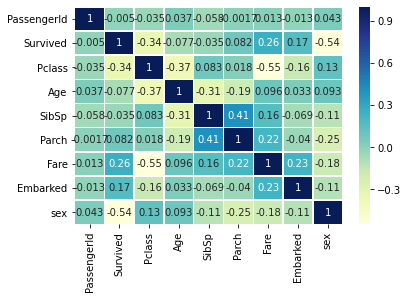

In [131]:
#heatmap
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu',linewidth=0.5)

In [132]:
train['Age'].isnull().mean()

0.19865319865319866

In [133]:
def impute_nan(train,variable,median):
    train[variable+'_median']=train[variable].fillna(median)

In [134]:
impute_nan(train,'Age',median)

In [135]:
median=train.Age.median()
median

28.0

In [136]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,sex,Age_median
0,1,0,3,22.0,1,0,7.2500,0.0,1,22.0
1,2,1,1,38.0,1,0,71.2833,2.0,0,38.0
2,3,1,3,26.0,0,0,7.9250,0.0,0,26.0
3,4,1,1,35.0,1,0,53.1000,0.0,0,35.0
4,5,0,3,35.0,0,0,8.0500,0.0,1,35.0


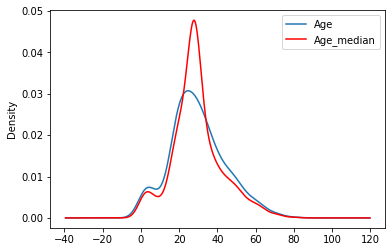

In [137]:
##plotting
fig=plt.figure()
ax=fig.add_subplot(111)
train['Age'].plot(kind='kde',ax=ax)
train['Age_median'].plot(kind='kde',ax=ax,color='red')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [138]:
train['Age'].dropna().sample(train['Age'].isnull().sum(),random_state=0).head()

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
Name: Age, dtype: float64

In [139]:
train[train['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [140]:
## imputing nan values
def impute_nan(train,variable,median):
    train[variable+'_median']=train[variable].fillna(median)
    train[variable+'_random']=train[variable]
    random_sample = train[variable].dropna().sample(train[variable].isnull().sum(),random_state=0)
    random_sample.index=train[train[variable].isnull()].index
    train.loc[train[variable].isnull(),variable+'_random']=random_sample

In [141]:
def impute_nan(test,variable,median):
    test[variable+'_median']=test[variable].fillna(median)
    test[variable+'_random']=test[variable]
    random_sample = test[variable].dropna().sample(test[variable].isnull().sum(),random_state=0)
    random_sample.index=test[test[variable].isnull()].index
    test.loc[test[variable].isnull(),variable+'_random']=random_sample

In [142]:
impute_nan(test,'Age',median)

In [143]:
impute_nan(train,'Age',median)

In [144]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,sex,Age_median,Age_random
0,1,0,3,22.0,1,0,7.2500,0.0,1,22.0,22.0
1,2,1,1,38.0,1,0,71.2833,2.0,0,38.0,38.0
2,3,1,3,26.0,0,0,7.9250,0.0,0,26.0,26.0
3,4,1,1,35.0,1,0,53.1000,0.0,0,35.0,35.0
4,5,0,3,35.0,0,0,8.0500,0.0,1,35.0,35.0


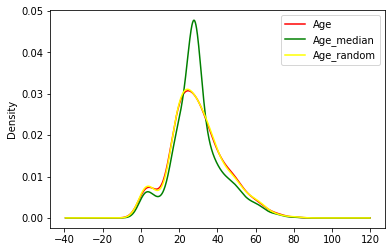

In [145]:
##plotting
fig=plt.figure()
ax=fig.add_subplot(111)
train['Age'].plot(kind='kde',ax=ax,color='red')
train.Age_median.plot(kind='kde',ax=ax,color='green')
train.Age_random.plot(kind='kde',ax=ax,color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [146]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
sex              0
Age_median       0
Age_random       0
dtype: int64

In [147]:
train=train.drop(['Age','Age_median'],axis=1)
test=test.drop(['Age'],axis=1)

In [148]:
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,sex,Age_random
0,1,0,3,1,0,7.2500,0.0,1,22.0
1,2,1,1,1,0,71.2833,2.0,0,38.0
2,3,1,3,0,0,7.9250,0.0,0,26.0
3,4,1,1,1,0,53.1000,0.0,0,35.0
4,5,0,3,0,0,8.0500,0.0,1,35.0


Text(0.5, 1.0, 'People survived with gender categories')

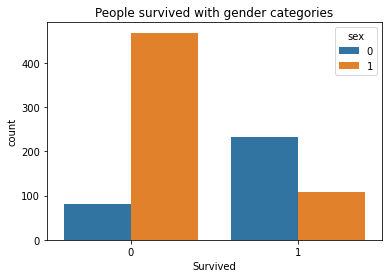

In [149]:
##seaborn plotting
sns.countplot(x='Survived',hue='sex',data=train)
plt.title('People survived with gender categories')

Text(0.5, 1.0, 'How Many Peoples Survived or Not')

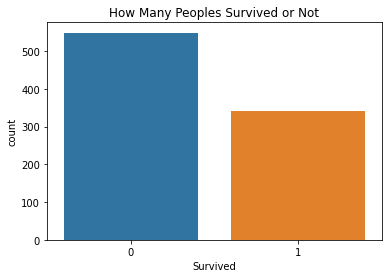

In [150]:
##Seaborn Plotting
sns.countplot(x='Survived',data=train)
plt.title('How Many Peoples Survived or Not') ##(0 means not survived ,1 means survived peoples)

# Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Text(0.5, 1.0, 'Peoples Survived in which classes')

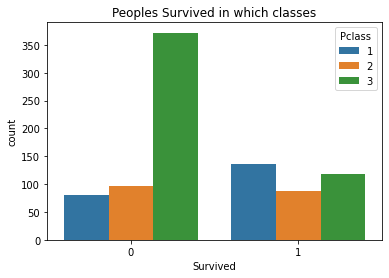

In [151]:
#Seaborn plotting
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.title("Peoples Survived in which classes")

# sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Text(0.5, 1.0, 'SibSp vs Pclass')

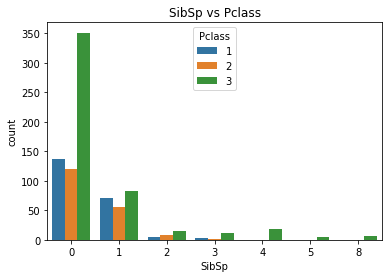

In [152]:
##Seaborn plotting
sns.countplot(x='SibSp',hue='Pclass',data=train)
plt.title("SibSp vs Pclass")

Text(0.5, 1.0, 'Survived vs Embarked')

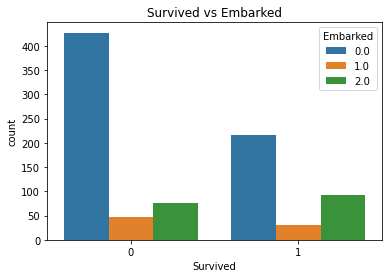

In [153]:
##Seaborn plotting
sns.countplot(x='Survived',hue='Embarked',data=train)
plt.title("Survived vs Embarked")

# parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Text(0.5, 1.0, 'Survived vs Embarked')

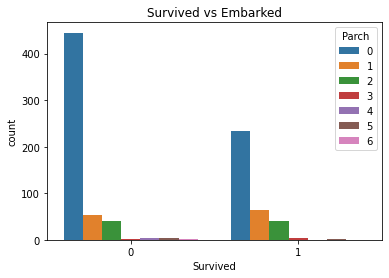

In [154]:
##Seaborn plotting
sns.countplot(x='Survived',hue='Parch',data=train)
plt.title("Survived vs Embarked")

In [155]:
test.head()

,PassengerId,Pclass,Name,SibSp,Parch,Fare,Embarked,sex,Age_median,Age_random
0,892,3,"Kelly, Mr. James",0,0,7.8292,1,1,34.5,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,7.0000,0,0,47.0,47.0
2,894,2,"Myles, Mr. Thomas Francis",0,0,9.6875,1,1,62.0,62.0
3,895,3,"Wirz, Mr. Albert",0,0,8.6625,0,1,27.0,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,12.2875,0,0,22.0,22.0


In [156]:
test=test.drop(['Name','Age_median'],axis=1)

In [157]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Embarked,sex,Age_random
0,892,3,0,0,7.8292,1,1,34.5
1,893,3,1,0,7.0000,0,0,47.0
2,894,2,0,0,9.6875,1,1,62.0
3,895,3,0,0,8.6625,0,1,27.0
4,896,3,1,1,12.2875,0,0,22.0


In [158]:
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,sex,Age_random
0,1,0,3,1,0,7.2500,0.0,1,22.0
1,2,1,1,1,0,71.2833,2.0,0,38.0
2,3,1,3,0,0,7.9250,0.0,0,26.0
3,4,1,1,1,0,53.1000,0.0,0,35.0
4,5,0,3,0,0,8.0500,0.0,1,35.0


In [159]:
test.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           1
Embarked       0
sex            0
Age_random     0
dtype: int64

In [160]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Fare           0
Embarked       2
sex            0
Age_random     0
dtype: int64

In [161]:
train[train['Embarked'].isnull()].index

Int64Index([61, 829], dtype='int64')

In [162]:
test['Fare'].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [163]:
impute_nan(train,'Embarked',median)

In [164]:
impute_nan(test,'Fare',median)

In [165]:
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,sex,Age_random,Embarked_median,Embarked_random
0,1,0,3,1,0,7.2500,0.0,1,22.0,0.0,0.0
1,2,1,1,1,0,71.2833,2.0,0,38.0,2.0,2.0
2,3,1,3,0,0,7.9250,0.0,0,26.0,0.0,0.0
3,4,1,1,1,0,53.1000,0.0,0,35.0,0.0,0.0
4,5,0,3,0,0,8.0500,0.0,1,35.0,0.0,0.0


In [166]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Embarked,sex,Age_random,Fare_median,Fare_random
0,892,3,0,0,7.8292,1,1,34.5,7.8292,7.8292
1,893,3,1,0,7.0000,0,0,47.0,7.0000,7.0000
2,894,2,0,0,9.6875,1,1,62.0,9.6875,9.6875
3,895,3,0,0,8.6625,0,1,27.0,8.6625,8.6625
4,896,3,1,1,12.2875,0,0,22.0,12.2875,12.2875


In [167]:
train=train.drop(['Embarked','Embarked_median'],axis=1)
test=test.drop(['Fare','Fare_median'],axis=1)

In [168]:
train=train.rename(columns={'Embarked_random':'Embarked'})
test=test.rename(columns={'Fare_random':'Fare'})

In [169]:
train=train.rename(columns={'Age_random':'Age'})
test=test.rename(columns={'Age_random':'Age'})

In [170]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split

In [171]:
x = train.drop(['Survived'],axis=1)
y = train['Survived']

In [172]:
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.3,random_state=0)

In [173]:
##prediction
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train, Y_train)

C:\Users\karthick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
prediction=lg.predict(X_test)

In [175]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.74      0.72      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [176]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

C:\Users\karthick\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
predict=rf.predict(X_test)

In [178]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       168
           1       0.75      0.61      0.67       100

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.78      0.78      0.77       268



In [179]:
from sklearn.metrics import accuracy_score

In [180]:
random_forest_accuracy=accuracy_score(Y_test,predict)
print(random_forest_accuracy)

0.7798507462686567


In [181]:
logistic_accuracy=accuracy_score(Y_test,prediction)
print(logistic_accuracy)

0.8022388059701493


In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
parameters = {
              'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
             }

In [184]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [185]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
search = GridSearchCV(SVC(), parameters, cv=5)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [186]:
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [187]:
prediction=search.predict(X_test)

In [188]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       139
           1       0.67      0.35      0.46        84

    accuracy                           0.69       223
   macro avg       0.68      0.62      0.62       223
weighted avg       0.69      0.69      0.66       223



In [189]:
svc_accuracy=accuracy_score(y_test,prediction)
print(svc_accuracy)

0.6905829596412556


In [190]:
param = {'max_depth': [6,9, None], 
         'n_estimators':[50, 70, 100, 150], 
          'max_features': [2,3],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          'min_samples_leaf':[3,4,5]}

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
from sklearn.ensemble import RandomForestClassifier
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, n_iter =10, cv=9)
rnd_search.fit(X_train,y_train)
rnd_search.best_params_
rnd_search.best_score_

0.8233532934131736

In [209]:
random_test_Survived = pd.Series(rnd_search.predict(test), name="Survived")

rf_predicted = pd.concat([test_id,random_test_Survived],axis=1)

In [212]:
rf_predicted.to_csv("rf_titanic_survival.csv",index=False)

In [211]:
rf_predicted.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [194]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

model = GridSearchCV(model,param_grid = param_grid, cv=3, scoring="accuracy", n_jobs= 4, verbose = 1)
model.fit(X_train,y_train)
model.best_score_
model.best_estimator_

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  70 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 576 out of 576 | elapsed:   10.2s finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features=0.2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=150, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [198]:
prediction=model.predict(test)

In [199]:
model.best_score_

0.7934131736526946

In [200]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Embarked,sex,Age,Fare
0,892,3,0,0,1,1,34.5,7.8292
1,893,3,1,0,0,0,47.0,7.0000
2,894,2,0,0,1,1,62.0,9.6875
3,895,3,0,0,0,1,27.0,8.6625
4,896,3,1,1,0,0,22.0,12.2875


In [202]:
test_id=test['PassengerId']

In [206]:
test_Survived = pd.Series(model.predict(test), name="Survived")

predicted = pd.concat([test_id,test_Survived],axis=1)

In [207]:
predicted.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [208]:
predicted.to_csv("titanic_predicted.csv")